<a href="https://colab.research.google.com/github/Rainwoorimforest/pytorch-study/blob/main/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as nvep

## Data Type
* 스칼라
* 벡터
* 행렬
* 텐서

In [4]:
scalar = np.array(3)
print(f'Scalar value: {scalar}')
print(f'Rank: {scalar.ndim}, Shape: {scalar.shape}')

Scalar value: 3
Rank: 0, Shape: ()


In [5]:
vector = np. array([0,1,2,3,4,5])
print(f'vector value: {vector}')
print(f'vector rank: {vector.ndim}, vector shape: {vector.shape}')

vector value: [0 1 2 3 4 5]
vector rank: 1, vector shape: (6,)


In [9]:
# 행렬
matrix = np.array([[0,1,2],[3,4,5],[6,7,8]])
print(f'Matrix values: \n {matrix}')
print(f'Rank: {matrix.ndim}, Shape: {matrix.shape}')


Matrix values: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
Rank: 2, Shape: (3, 3)


### tensor
rank가 여러개인 것을 많이 다루는데,
보통 가장 앞에 있는 인덱스를 batch로 받는다.
* 일반적인 예시: (batch, width, height)
* **(일반적으로)가장 앞에 있는 첫번째 차원은 batch라 생각하고 , 그 뒤에 나머지 rank개의 텐서를 진짜 데이터의 형식이라 생각하자!**


deep netural network도 마찬가지로 수많은 파라미터를 가지고 있다. 4만장 이미지를 한꺼번에 인간이 볼 수 없듯이 컴퓨터도 메모리 안에 올릴 수 있는 메모리가 한정적이므로 이를 데이터를 잘라서 input으로 넣는다. 이를 mini batch라한다.

✔️batch = 2, width = 5, height = 5
➡️몇만장 되는 5x5(데이터 형식) 이미지를 2장씩 가져와서 처리할거다,

✅ 2. 직접 예제로 확인
🔸 예: 4장, 2×3 행렬 → shape = (4, 2, 3)

In [63]:
example = torch.tensor([
    [[1,2,3],[4,5,6]],

    [[1,2,3],[4,5,6]],

    [[1,2,3],[4,5,6]],

    [[1,2,3],[4,5,6]]

])

print(example.shape)

torch.Size([4, 2, 3])


In [12]:
tensor = np.array([[[0,1],[4,5]], [[6,7],[7,8]], [[10,11],[2,4]]])
print(f'Tensor values: \n{tensor}')
print(f'Rank: {tensor.ndim}, Shape: {tensor.shape}')

Tensor values: 
[[[ 0  1]
  [ 4  5]]

 [[ 6  7]
  [ 7  8]]

 [[10 11]
  [ 2  4]]]
Rank: 3, Shape: (3, 2, 2)


## torch - numpy

* 앞에서는 numpy로 tensor를 만들었고,
* 지금부터는 torch로 tensor를 바로 만들어보자

짚어볼거는 각각의 인덱스를 보자.
tensor[0]은 행을 말하는 것!!


In [17]:
import torch

t = torch.tensor([[0,1,2],[3,4,5],[6,7,8]])
print(f'Tensor values: \n{t}')
print(f'Rank: {t.dim()}, Shape: {t.shape}')


Tensor values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
Rank: 2, Shape: torch.Size([3, 3])


In [16]:
print(f't[0]: {t[0]}')
print(f't[-1]: {t[-1]}')
print(f't[-2]: {t[-2]}')

t[0]: tensor([0, 1, 2])
t[-1]: tensor([6, 7, 8])
t[-2]: tensor([3, 4, 5])


In [19]:
print(f't[:1]: {t[:1]}')
print(f't[1:2]: {t[1:2]}')
print(f't[2:]: {t[2:]}')

t[:1]: tensor([[0, 1, 2]])
t[1:2]: tensor([[3, 4, 5]])
t[2:]: tensor([[6, 7, 8]])


### tensor 연산
* Broadcasting: 덧셈, 뺏셈 시에는 차원의 수가 보통 같아야 하는데, pytorch에서는 자동적으로 broadingcasting지원해서 차원 수가 지 않아도 알아서 계산해준다.
-> 텐서 연산에는 오류가 안나고 학습이 돌아가기 때문에 이건 항상 확인해야한다

* same shape

---
* vector + scalar

In [23]:
print(torch.tensor([1,4]) + torch.tensor([2,-1])) #same shape
print(torch.tensor([1,4]) + torch.tensor([-1])) # Broadcasting

tensor([3, 3])
tensor([0, 3])


In [29]:
print(torch.tensor([1,2]) + torch.tensor([[3],[4]]))

tensor([[4, 5],
        [5, 6]])


In [31]:
arr_1 = np.array(
    [1,2]
)

arr_2 = np.array(
    [
        [3], [4]
    ]
)
arr_new = arr_1 + arr_2

print(arr_new)

[[4 5]
 [5 6]]


In [34]:
m1 = torch.tensor([[1,2],[3,4]])
m2 = torch.tensor([[1],[2]])
print(m1.shape, m2.shape)
print(f'{m1}')
print(f'{m1}')

torch.Size([2, 2]) torch.Size([2, 1])
tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])


In [35]:
# 행렬 곱
# layer하나 지날때마다 행렬곱: 한 레이어에서 다음 레이어로 넘어갈 때, 입력 벡터에 가중치를 곱해주는 연산.

# 이 연산은 **정보를 선형 변환(linear transformation)**하는 역할을 함.
print(f'Matrix multiplication 곱셈: \n{m1.matmul(m2)} \n{m1@m2}') # matmul 쓰기 귀찮으면 @으로해도 무방

Matrix multiplication 곱셈: 
tensor([[ 5],
        [11]]) 
tensor([[ 5],
        [11]])


In [36]:
# Hadamard product: 원소끼리 곱
# attention mask할때 자주 쓰임 ➡️ 주로 **정보를 유지하거나 제거하는 역할 (필터링)**으로 사용됨.
print(f'Elementwise multiplication: \n{m1.mul(m2)} \n{m1*m2}') # mul 쓰기 귀찮으면 *으로해도 무방

Elementwise multiplication: 
tensor([[1, 2],
        [6, 8]]) 
tensor([[1, 2],
        [6, 8]])


In [47]:
# (추가)주 사용처:
# Attention mask,

# Self-attention score와 mask를 곱해서 특정 위치 무시,

# 게이트 연산 (예: LSTM, GRU)

# Residual 연결에서 scaling 등)
# 예: attention score와 mask를 곱해서 마스킹
scores = torch.tensor([
    [0.8, 0.1],
    [0.5, 0.9]
])

scores = torch.randn(8, 8)  # (query_len, key_len)
mask = torch.tensor([
    [1, 1, 0, 0, 1, 1, 0, 1]
], dtype=torch.float32)  # 특정 위치를 무시하려는 mask

masked_scores = scores * mask  # 원소별 곱

print(masked_scores)

tensor([[ 0.6733, -1.4621,  0.0000, -0.0000,  0.2063, -0.2882, -0.0000, -0.1782],
        [-1.5941, -1.2985, -0.0000,  0.0000,  0.5634, -0.3931, -0.0000, -0.3929],
        [ 0.6646, -1.5730,  0.0000,  0.0000, -0.8627, -0.5128,  0.0000,  0.3383],
        [ 1.5517, -0.4883,  0.0000,  0.0000, -0.2312, -0.3795, -0.0000, -0.9935],
        [ 0.1542, -0.0982, -0.0000, -0.0000,  0.5292, -0.1590, -0.0000, -0.9541],
        [ 0.9866, -0.6249, -0.0000, -0.0000,  0.6068,  0.0539, -0.0000,  1.8513],
        [-1.1873, -0.6033,  0.0000,  0.0000, -1.0674, -0.8804, -0.0000,  0.0982],
        [-1.2316,  0.4669,  0.0000,  0.0000, -1.7576, -1.4969,  0.0000,  1.4770]])


scores =
[[0.8, 0.1],    ← query 0
 [0.5, 0.9]]    ← query 1
        ↑
      key 0, key 1

# 열 기준(dim=0) 최대값 비교:

Column 0: max(0.8, 0.5) → 0.8 → index 0  
Column 1: max(0.1, 0.9) → 0.9 → index 1

# 출력 결과:

Max values (dim=0): tensor([0.8, 0.9])
Argmax indices (dim=0): tensor([0, 1])

# 🤔 현실적인 의미 (self-attention 시나리오로 본다면)
scores[i][j]는 query i가 key j를 얼마나 주목하는지를 의미

max(dim=0)는 각 key가 어떤 query로부터 가장 크게 주목받는지를 본다고 해석 가능


In [43]:

t = torch.tensor([[1.,2.],[3.,4.]])
print(t)
print(t.mean())
print(t.mean(dim=0)) # dim 행축으로 연산하겠다. 열 요소들끼리 연산. 즉, dim=0은 1과 3의 평균
print(t.mean(dim=1))# dim 열축으로 연산하겠다.행 요소들끼리 연산. 즉, dim=1은 2과 4의 평균,
print(t.std())

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor(1.2910)


In [39]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])


In [40]:
print(t.max())

tensor(4.)


In [ ]:
import torch

t = torch.tensor([
    [1., 2.],
    [3., 4.]
])

values  = tensor([3., 4.])   # 각 열(column)에서 최대값
indices = tensor([1, 1])     # 각 열에서 최대값이 있는 행(row)의 인덱스


values, indices = t.max(dim=0) # 🔍 dim=0(행축으로)→ 열 방향으로 연산, 각 column의 값들을 비교:



| Column index | 비교 값들 | Max 값 | Argmax (행 인덱스) |
| ------------ | ----- | ----- | -------------- |
| 0            | 1, 3  | **3** | 1              |
| 1            | 2, 4  | **4** | 1              |


In [42]:
print(f'Max: {t.max(dim=0)[0]}, Argmax: {t.max(dim=0)[1]}')

Max: tensor([3., 4.]), Argmax: tensor([1, 1])


## tensor 연산2

* 2장짜리 입체적으로 있던 것이 위아래 붙어 3x4 나오도록..
* 2장짜리 입체적으로 있던 것이 1*3으로만 살려 뒤로 붙어나오도록

### view

In [49]:
#view(기존에는 reshape)
# -1: 계산하기 귀찮으니까 남은것은 pytorch가 알아서 정리하라는 일종의 ... 머시기

t = torch.tensor([[[0,1,2],[3,4,5]],[[6,7,8],[9,10,11]]])
print(t)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])


In [51]:
print(t.shape) # 2x3이미지가 2장짜리 겹쳐져있는 것

torch.Size([2, 2, 3])


In [52]:
print(t.view([-1,3])) # 열 3개만 살리고 알아서 계산 : 위아래
print(t.view([-1,3]).shape)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


In [53]:
print(t.view([-1,1,3])) # 행 1 열 3개만 살리고 알아서 계산: 뒤로 보내
print(t.view([-1,1,3]).shape)

tensor([[[ 0,  1,  2]],

        [[ 3,  4,  5]],

        [[ 6,  7,  8]],

        [[ 9, 10, 11]]])
torch.Size([4, 1, 3])


✅ 이처럼 reshape하면서 내가 input으로 넣는 데이터의 shape를 항상 확인하는 습관을 가지자.


### squeeze

In [54]:
t = torch.tensor([[0],[1],[2],[3]])
print(t)
print(t.shape)

print(t.squeeze())
print(t.squeeze().shape)

tensor([[0],
        [1],
        [2],
        [3]])
torch.Size([4, 1])
tensor([0, 1, 2, 3])
torch.Size([4])


In [57]:
import torch

t = torch.tensor([
    [[1., 2., 3.]],
    [[4., 5., 6.]],
    [[7., 8., 9.]],
    [[10., 11., 12.]]
])

print(t.shape)


torch.Size([4, 1, 3])


In [60]:
# concatenation
t1 = torch.tensor([[1,2],[3,4]])
t2 = torch.tensor([[5,6],[7,8]])
print(t1)
print(t2)
print(torch.cat([t1,t2], dim=0)) # 행축으로 계산 4x2
print(torch.cat([t1,t2], dim=1)) # 열축으로 계산 2x4


tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 8]])
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


In [61]:
#Stacking
t1 = torch.tensor([1,4])
t2 = torch.tensor([2,5])
t3 = torch.tensor([3,6])

print(torch.stack([t1,t2,t3])) # 3x2
print(torch.stack([t1,t2,t3], dim=1)) # 2x3


tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [66]:
# ones and zeros
t = torch.tensor([[3,2,-1],[3,2,0]])
print(t.shape)

print(torch.ones_like(t))
print(torch.zeros_like(t))

torch.Size([2, 3])
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[0, 0, 0],
        [0, 0, 0]])


In [68]:
# In-place Operation
t = torch.tensor([[1.,2.], [3.,4.]])
print(t.mul(2.))
print(t)
print(t.mul_(2.)) # _ 붙이면 n-place Operation작동해서 연산 결과가 original 변수에 저장
print(t)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


In [76]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

train_dataset = datasets.MNIST(
    root = './data', train=True, transform = transforms.ToTensor(), download = True)

test_dataset = datasets.MNIST(
    root = './data', train=False, transform = transforms.ToTensor(), download = True)


torch.Size([1, 28, 28])
5


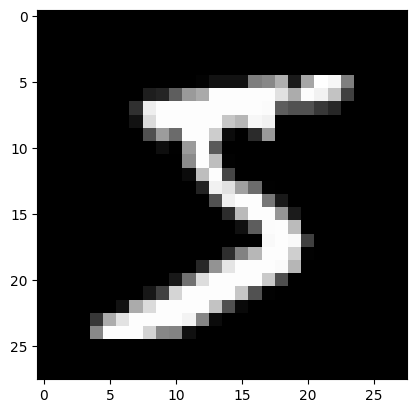

In [74]:
image, label = train_dataset[0] # sample

print(image.shape) # 1장짜리 w*h 이미지
print(label)

import matplotlib.pyplot as plt

plt.imshow(image.squeeze(), cmap='gray')
plt.show()